## Exploring the Data

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# loading in the data
fem_temp = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Fem Temp.csv')
fem_act = fem_temp = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Fem Act.csv')
male_temp = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Male Temp.csv')
male_act = fem_temp = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Male Act.csv')

In [12]:
#adding a time column, so that we can do like time of day analysis
#but this is also assuming that everything started at midnight on jan 1st
#and thats not exactly true, but it should be good for a some simple graphs
minutes_per_day=1440 # according to google
days=14 # bc its over 2 weeks
total_minutes =minutes_per_day *days 
time_index =pd.date_range(start="2024-01-01", periods=total_minutes, freq="T")

for df in [fem_act,fem_temp,male_act,male_temp]:
    df['Time'] =time_index # makin a a time column

# fem_act.head()

In [13]:
# melting the data to make plotting a bit easier
fem_temp_melt=fem_temp.melt(id_vars="Time", var_name="Mouse", value_name="Temperature")
male_temp_melt=male_temp.melt(id_vars="Time", var_name="Mouse", value_name="Temperature")
fem_act_melt =fem_act.melt(id_vars="Time", var_name="Mouse", value_name="Activity")
male_act_melt =male_act.melt(id_vars="Time", var_name="Mouse", value_name="Activity")

1. line plot of the mean temp over time (male v female)

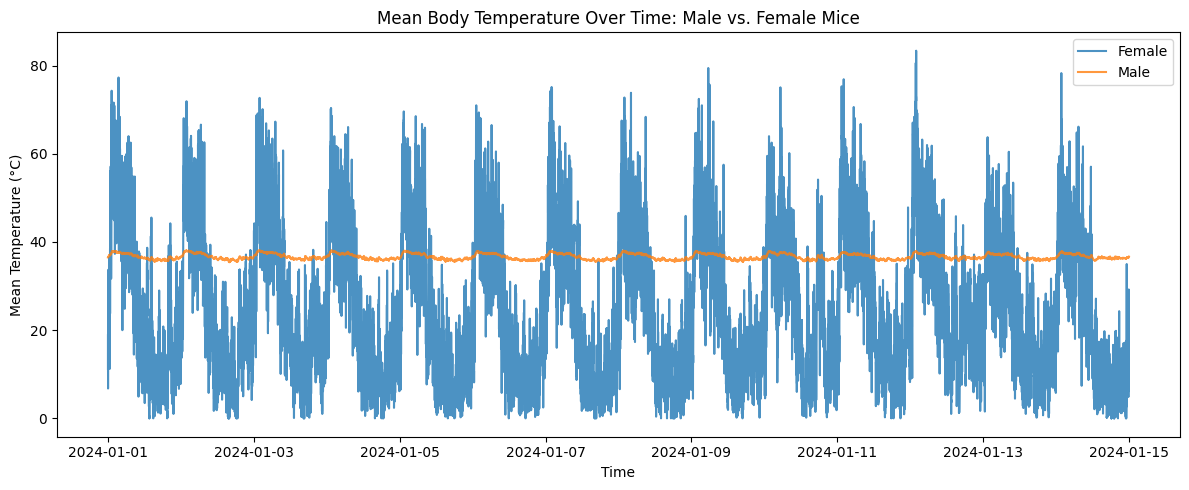

In [14]:
fem_temp_avg = fem_temp_melt.groupby("Time")["Temperature"].mean().reset_index()
fem_temp_avg["Sex"]="Female"

male_temp_avg = male_temp_melt.groupby("Time")["Temperature"].mean().reset_index()
male_temp_avg["Sex"] ="Male"

temp_avg_combined=pd.concat([fem_temp_avg, male_temp_avg])

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(fem_temp_avg["Time"], fem_temp_avg["Temperature"], label="Female", alpha=0.8)
ax.plot(male_temp_avg["Time"], male_temp_avg["Temperature"], label="Male", alpha=0.8)
ax.set_title("Mean Body Temperature Over Time: Male vs. Female Mice")
ax.set_xlabel("Time")
ax.set_ylabel("Mean Temperature (°C)")
ax.legend()

plt.tight_layout()
plt.show()